In [150]:
import pandas as pd
import numpy as np

weather = pd.read_csv("./466881_2024_daily.csv")
weather = weather.rename(columns={"Unnamed: 0": "Date"})
weather = weather.drop_duplicates(subset='Date', keep='first')
weather = weather.set_index(["Date"])

# filter the cols
valid_col = weather.select_dtypes(include="number").columns

# replace neg number to NaN
weather = weather[valid_col].mask(weather[valid_col]<0, np.nan)
weather = weather.ffill()

print(valid_col)
print(weather)

Index(['StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Tx', 'TxMaxAbs',
       'TxMinAbs', 'Td', 'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust',
       'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpMax60', 'SunShine',
       'SunShineRate', 'GloblRad', 'EvapA', 'TxSoil0cm', 'TxSoil5cm',
       'TxSoil10cm', 'TxSoil20cm', 'TxSoil30cm', 'TxSoil50cm', 'TxSoil100cm'],
      dtype='object')
            StnPres  SeaPres  StnPresMax  StnPresMin    Tx  TxMaxAbs  \
Date                                                                   
2024-01-01   1020.1   1023.0      1022.4      1018.2  16.3      18.1   
2024-01-02   1015.4   1018.3      1018.3      1012.5  17.5      24.2   
2024-01-03   1018.8   1021.7      1022.9      1014.3  14.3      17.0   
2024-01-04   1018.8   1021.7      1022.1      1016.6  15.4      18.0   
2024-01-05   1017.5   1020.4      1019.3      1015.1  16.9      22.5   
...             ...      ...         ...         ...   ...       ...   
2024-12-28   1024.9   1027.8      102

In [151]:
# NaN percentaget test
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]
null_pct

StnPres         0.0
SeaPres         0.0
StnPresMax      0.0
StnPresMin      0.0
Tx              0.0
TxMaxAbs        0.0
TxMinAbs        0.0
Td              0.0
RH              0.0
RHMin           0.0
WS              0.0
WD              0.0
WSGust          0.0
WDGust          0.0
Precp           0.0
PrecpHour       0.0
PrecpMax10      0.0
PrecpMax60      0.0
SunShine        0.0
SunShineRate    0.0
GloblRad        0.0
EvapA           0.0
TxSoil0cm       0.0
TxSoil5cm       0.0
TxSoil10cm      0.0
TxSoil20cm      0.0
TxSoil30cm      0.0
TxSoil50cm      0.0
TxSoil100cm     0.0
dtype: float64

In [152]:
# test repeat date
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()

Date
2024    366
2025      1
Name: count, dtype: int64

In [153]:
# determine which cols we want
used_col = ["Tx", "RH", "WS", "WD", "Precp", "TxMaxAbs", "TxMinAbs"]
weather[used_col]

,Tx,RH,WS,WD,Precp,TxMaxAbs,TxMinAbs
Date,,,,,,,
2024-01-01,16.3,69.0,2.9,100.0,0.0,18.1,14.0
2024-01-02,17.5,76.0,1.6,80.0,0.0,24.2,11.7
2024-01-03,14.3,88.0,1.5,280.0,15.5,17.0,10.9
2024-01-04,15.4,69.0,2.5,120.0,0.0,18.0,11.1
2024-01-05,16.9,75.0,1.3,160.0,0.0,22.5,11.1
...,...,...,...,...,...,...,...
2024-12-28,12.9,74.0,2.0,70.0,7.0,15.5,11.8
2024-12-29,15.5,66.0,2.8,110.0,0.0,19.8,11.8
2024-12-30,16.8,79.0,0.9,330.0,0.0,19.6,14.4


In [154]:
weather["target"] = weather["Tx"].shift(-1)
weather = weather.dropna()

In [155]:
weather

,StnPres,SeaPres,StnPresMax,StnPresMin,Tx,TxMaxAbs,TxMinAbs,Td,RH,RHMin,...,GloblRad,EvapA,TxSoil0cm,TxSoil5cm,TxSoil10cm,TxSoil20cm,TxSoil30cm,TxSoil50cm,TxSoil100cm,target
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,1020.1,1023.0,1022.4,1018.2,16.3,18.1,14.0,10.6,69.0,62.0,...,6.41,1.3,17.6,18.2,18.1,18.7,18.6,19.7,20.7,17.5
2024-01-02,1015.4,1018.3,1018.3,1012.5,17.5,24.2,11.7,12.8,76.0,48.0,...,15.40,1.3,17.9,18.1,17.7,18.1,18.0,19.2,20.7,14.3
2024-01-03,1018.8,1021.7,1022.9,1014.3,14.3,17.0,10.9,12.2,88.0,65.0,...,1.32,1.3,16.8,17.5,17.4,18.1,18.0,19.1,20.6,15.4
2024-01-04,1018.8,1021.7,1022.1,1016.6,15.4,18.0,11.1,9.6,69.0,59.0,...,4.98,1.4,15.9,16.3,16.2,16.9,17.1,18.5,20.5,16.9
2024-01-05,1017.5,1020.4,1019.3,1015.1,16.9,22.5,11.1,12.3,75.0,55.0,...,14.12,2.3,17.1,17.4,16.9,17.3,17.2,18.3,20.3,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,1022.2,1025.1,1023.8,1019.8,16.5,18.6,15.3,13.8,85.0,74.0,...,3.46,0.5,17.9,18.0,17.8,18.3,18.2,19.0,20.3,12.9
2024-12-28,1024.9,1027.8,1026.4,1023.6,12.9,15.5,11.8,8.4,74.0,61.0,...,2.23,1.1,16.1,16.6,16.7,17.6,17.8,18.8,20.4,15.5
2024-12-29,1021.5,1024.4,1024.7,1018.2,15.5,19.8,11.8,9.0,66.0,50.0,...,13.71,2.7,16.1,16.2,16.0,16.7,16.9,18.2,20.3,16.8


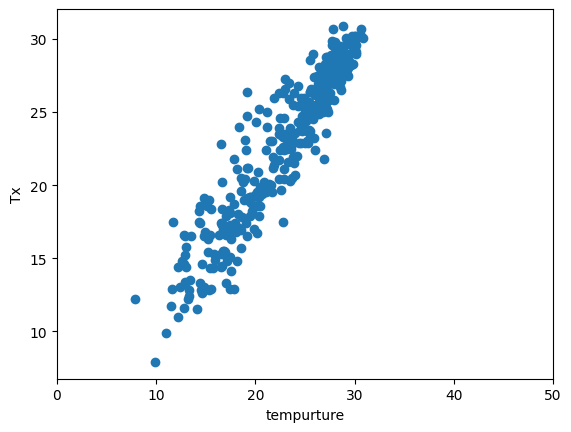

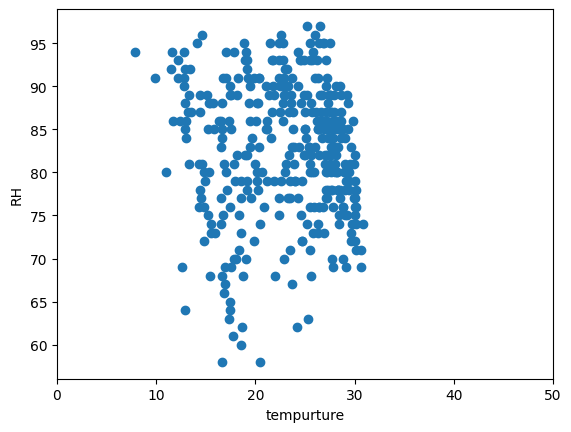

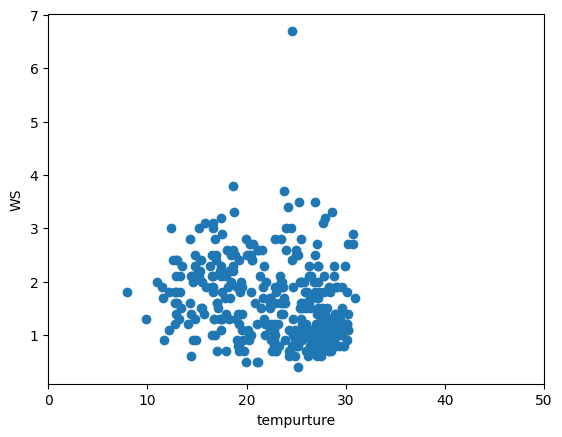

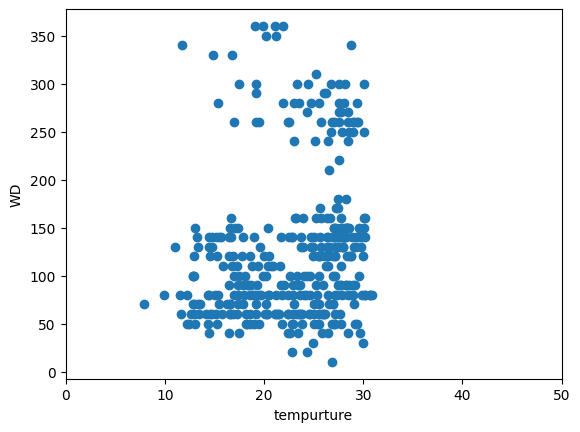

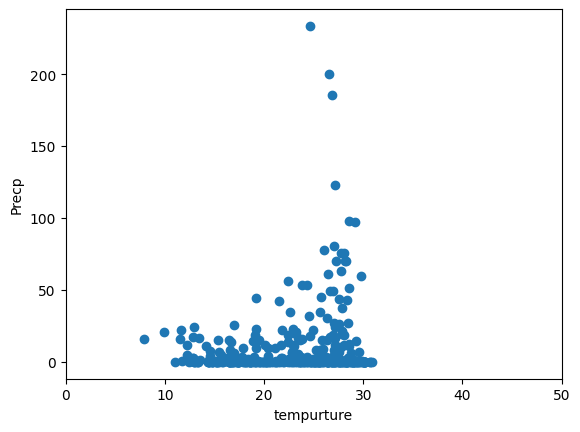

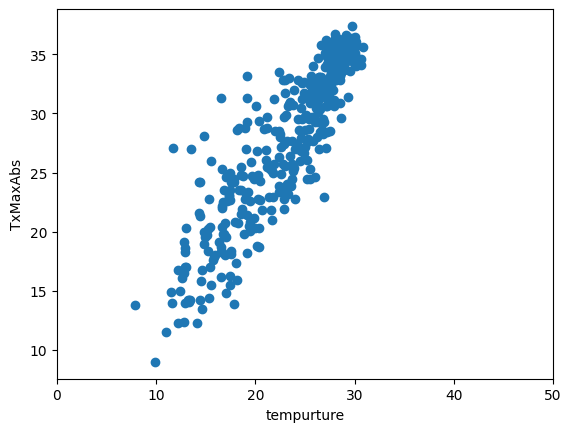

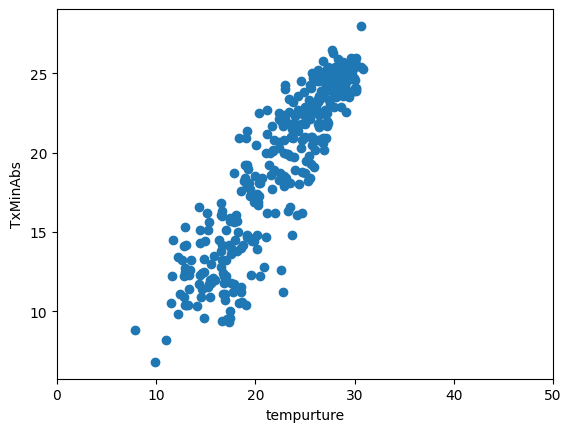

In [156]:
import matplotlib.pyplot as plt
for col in used_col:
    plt.figure() 
    plt.scatter(weather['target'], weather[col])
    plt.xlim(0, 50)
    plt.xlabel('tempurture')
    plt.ylabel(f'{col}')
    plt.show()

In [157]:
X = weather[used_col]
y = weather["target"]

In [158]:
print(X)

              Tx    RH   WS     WD  Precp  TxMaxAbs  TxMinAbs
Date                                                         
2024-01-01  16.3  69.0  2.9  100.0   0.00      18.1      14.0
2024-01-02  17.5  76.0  1.6   80.0   0.00      24.2      11.7
2024-01-03  14.3  88.0  1.5  280.0  15.50      17.0      10.9
2024-01-04  15.4  69.0  2.5  120.0   0.00      18.0      11.1
2024-01-05  16.9  75.0  1.3  160.0   0.00      22.5      11.1
...          ...   ...  ...    ...    ...       ...       ...
2024-12-27  16.5  85.0  2.1  100.0   0.09      18.6      15.3
2024-12-28  12.9  74.0  2.0   70.0   7.00      15.5      11.8
2024-12-29  15.5  66.0  2.8  110.0   0.00      19.8      11.8
2024-12-30  16.8  79.0  0.9  330.0   0.00      19.6      14.4
2024-12-31  14.9  73.0  1.9  110.0   0.00      18.0      12.0

[366 rows x 7 columns]


In [159]:
print(y)

Date
2024-01-01    17.5
2024-01-02    14.3
2024-01-03    15.4
2024-01-04    16.9
2024-01-05    16.7
              ... 
2024-12-27    12.9
2024-12-28    15.5
2024-12-29    16.8
2024-12-30    14.9
2024-12-31    15.9
Name: target, Length: 366, dtype: float64


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)

#create model and train
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_val)
print(mean_absolute_error(y_val, melb_preds))


1.8654347826086946


In [163]:
X_test = pd.DataFrame({'Tx':[15.9], 'RH':[85.0], 'WS':[2.3], 'WD':[80.0], 'Precp':[8.0], 'TxMaxAbs':[17.3], 'TxMinAbs':[14.8]})
pred = forest_model.predict(X_test)
print(pred)

[16.631]


In [164]:
used_col

['Tx', 'RH', 'WS', 'WD', 'Precp', 'TxMaxAbs', 'TxMinAbs']